#  Orman Yangını Şiddeti Tahmini Projesi 🌳🔥

##  1. VERİ YÜKLEME VE İNCELEME

In [2]:
#Colabe drive'ınızı ekleyip veri setini atın kolaylık olsun
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

try:
  df = pd.read_csv("/content/drive/MyDrive/forestfires.csv")
except:
  # İsterseniz drive bağlamak yerine soldaki klasörü açıp veri setini oraya sürükleyebilirsiniz.
  # Kod böyle de çalışır.
  df = pd.read_csv('forestfires.csv')
print(df)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/forestfires.csv')

## 2. GÖRSELLEŞTİRME (EDA) YUSUF DİLER'İN KISMI

In [ ]:
# İlk 5 satır
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area,temp_RH_ratio
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,0.157692
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,0.529412
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,0.429412
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,0.084694
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,0.114000


In [ ]:
# Verinin temel istatistikleri
print("Veri Seti İstatistiksel Özeti:")
display(df.describe())


print("\nEksik Değer Kontrolü:")
print(df.isnull().sum())

Veri Seti İstatistiksel Özeti:


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000



Eksik Değer Kontrolü:
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


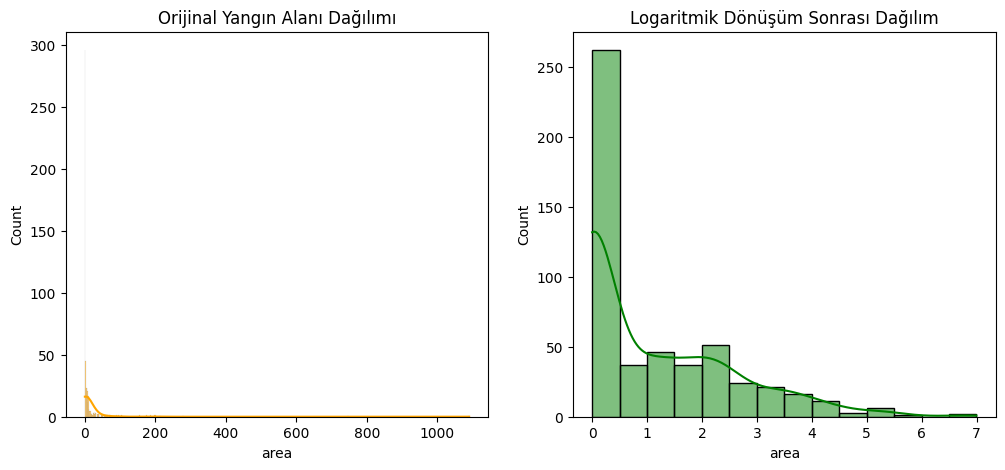

In [ ]:
plt.figure(figsize=(12, 5))

# Sol grafik: Orijinal dağılım
plt.subplot(1, 2, 1)
sns.histplot(df['area'], kde=True, color='orange')
plt.title('Orijinal Yangın Alanı Dağılımı')

# Sağ grafik: Log dönüşümü uygulanmış dağılım
plt.subplot(1, 2, 2)
# np.log1p kullanıyoruz çünkü 0 değerleri için hata almamalıyız (ln(x+1))
sns.histplot(np.log1p(df['area']), kde=True, color='green')
plt.title('Logaritmik Dönüşüm Sonrası Dağılım')

plt.show()

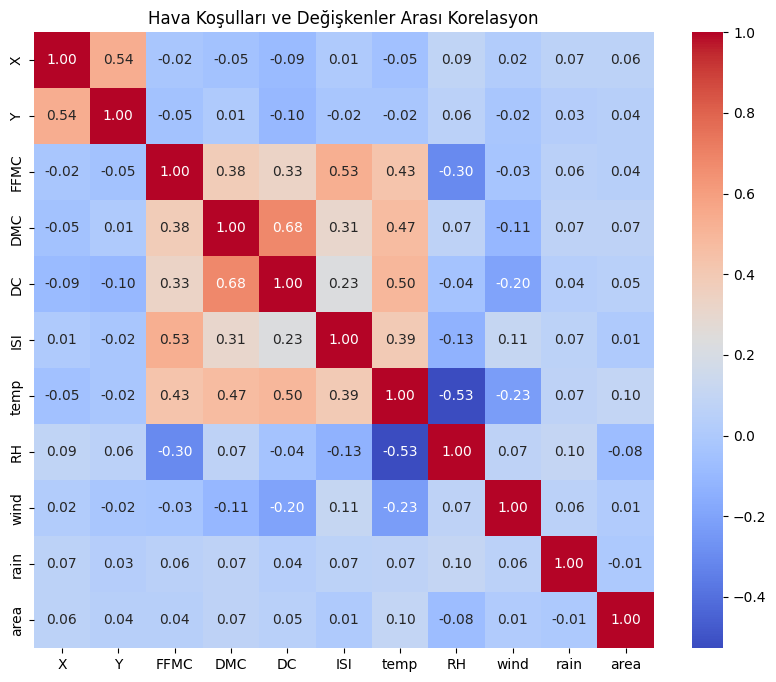

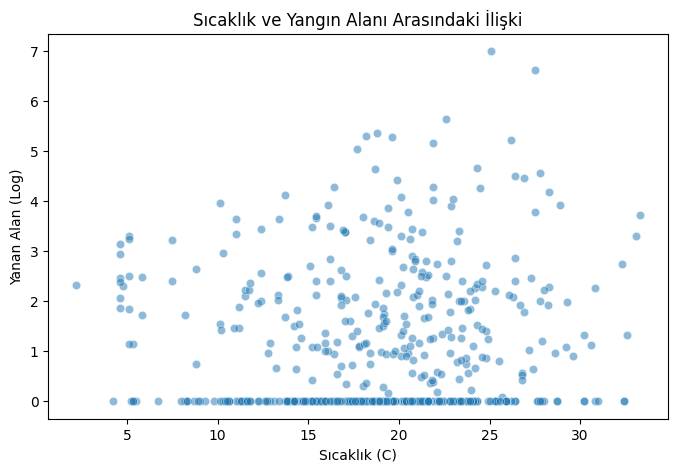

In [ ]:
# Korelasyon Isı Haritası
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Hava Koşulları ve Değişkenler Arası Korelasyon')
plt.show()

# En güçlü ilişki: Sıcaklık vs Yangın Alanı (Log)
df['log_area'] = np.log1p(df['area'])
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp', y='log_area', data=df, alpha=0.5)
plt.title('Sıcaklık ve Yangın Alanı Arasındaki İlişki')
plt.xlabel('Sıcaklık (C)')
plt.ylabel('Yanan Alan (Log)')
plt.show()

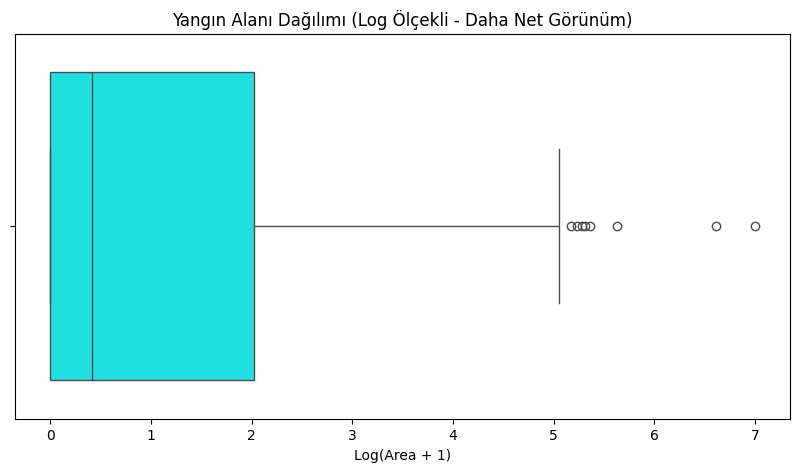

In [ ]:
# Daha iyi bir Box Plot görüntüsü için Logaritmik Ölçek
plt.figure(figsize=(10, 5))
sns.boxplot(x=np.log1p(df['area']), color='cyan')
plt.title('Yangın Alanı Dağılımı (Log Ölçekli - Daha Net Görünüm)')
plt.xlabel('Log(Area + 1)')
plt.show()

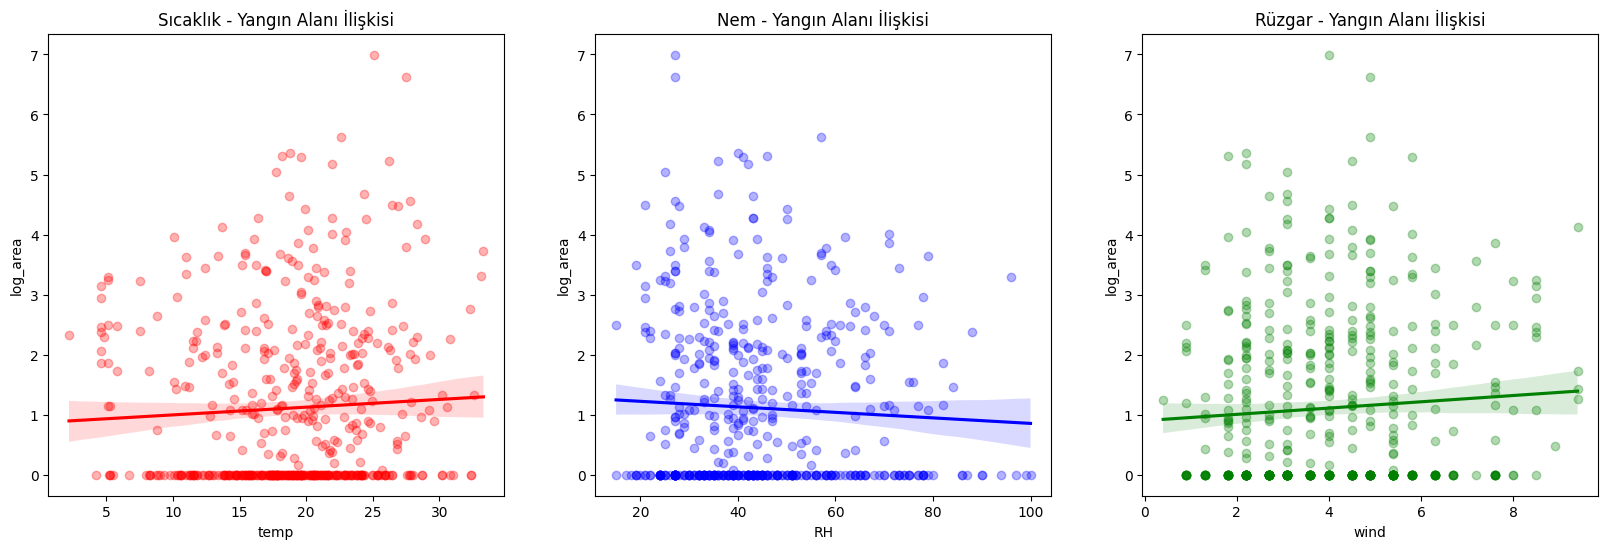

In [ ]:
# Hoca'nın istediği spesifik korelasyon analizi
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Sıcaklık vs Alan
sns.regplot(x='temp', y='log_area', data=df, ax=axes[0], color='red', scatter_kws={'alpha':0.3})
axes[0].set_title('Sıcaklık - Yangın Alanı İlişkisi')

# Nem vs Alan
sns.regplot(x='RH', y='log_area', data=df, ax=axes[1], color='blue', scatter_kws={'alpha':0.3})
axes[1].set_title('Nem - Yangın Alanı İlişkisi')

# Rüzgar vs Alan
sns.regplot(x='wind', y='log_area', data=df, ax=axes[2], color='green', scatter_kws={'alpha':0.3})
axes[2].set_title('Rüzgar - Yangın Alanı İlişkisi')

plt.show()

## 3. VERİ ÖN İŞLEME VE ÖZNİTELİK MÜHENDİSLİĞİ (EREN)

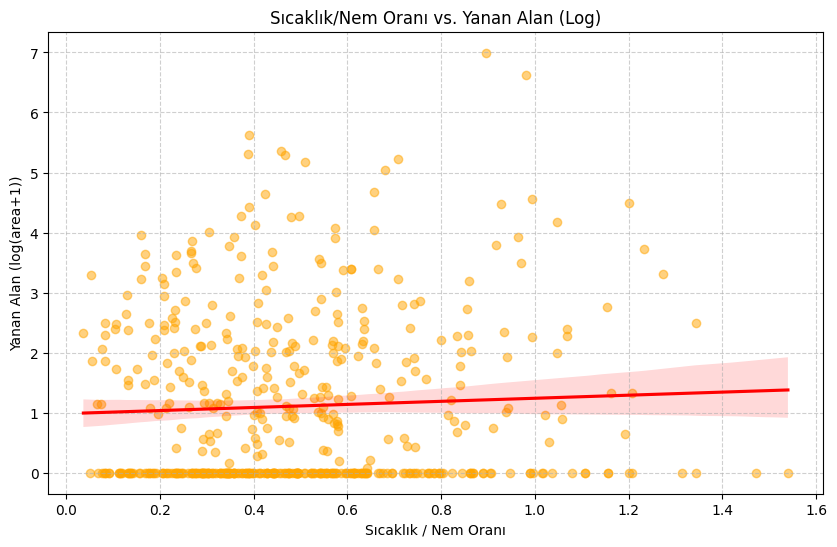

In [3]:
# Hedef değişken 'area' veri seti çok çarpık olduğu için
# logaritmik ölçeğe çevirilir.
df['log_area'] = np.log1p(df['area'])

# Sıcaklık / Nem oranı (Sıcaklık arttıkça ve nem düştükçe bu değer büyür)
df['temp_RH_ratio'] = df['temp'] / (df['RH'] + 1)

plt.figure(figsize=(10, 6))
sns.regplot(x='temp_RH_ratio', y='log_area', data=df,
            scatter_kws={'alpha':0.5, 'color':'orange'},
            line_kws={'color':'red'})

plt.title('Sıcaklık/Nem Oranı vs. Yanan Alan (Log)')
plt.xlabel('Sıcaklık / Nem Oranı')
plt.ylabel('Yanan Alan (log(area+1))')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Bu grafikte y=0 hattında çok fazla veri noktası var. Bunlar "Yangın çıktı ama YAYILMADI" anlamına gelirler.

Grafikte sağa doğru gidildikçe (oran arttıkça) noktaların yukarı-aşağı yayılımının arttığı görülüyor. Bu, risk arttıkça sonucun daha öngörülemez hale geldiğini gösterir.

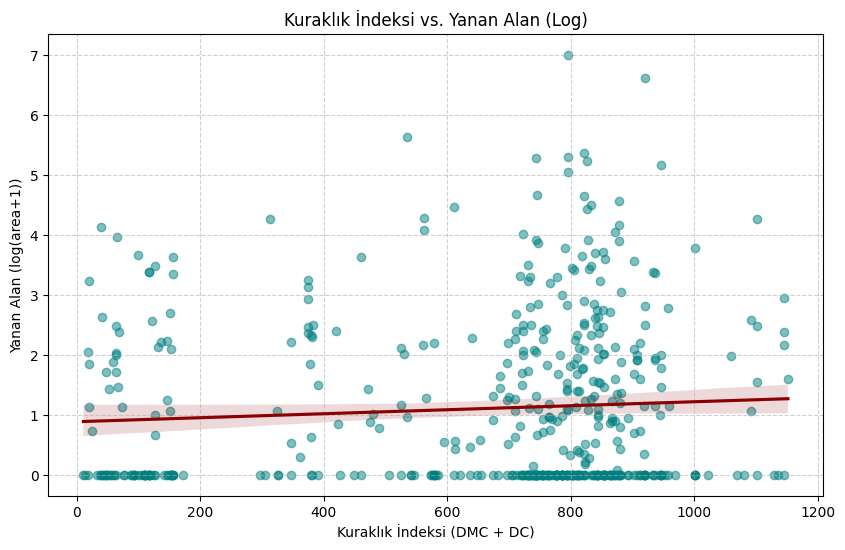

In [4]:
# Topraktaki nem ve kuraklık indekslerini toplayarak genel kuraklık indeksi oluşturma
df['drought_index'] = df['DMC'] + df['DC']

plt.figure(figsize=(10, 6))
sns.regplot(x='drought_index', y='log_area', data=df,
            scatter_kws={'alpha':0.5, 'color':'teal'},
            line_kws={'color':'darkred'})

plt.title('Kuraklık İndeksi vs. Yanan Alan (Log)')
plt.xlabel('Kuraklık İndeksi (DMC + DC)')
plt.ylabel('Yanan Alan (log(area+1))')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Yüksek kuraklık büyük bir yangın için gerekli bir şarttır ama yeterli değildir. Büyük bir yangın için hem kuraklık, hem rüzgar, hem de bir ateşleme (izmarit, yıldırım vb.) aynı anda gerçekleşmelidir. y=0 hattında yine yangınlar büyümeden sönmüş, burada insan müdahalesi(itfaiye) muhtemeldir.

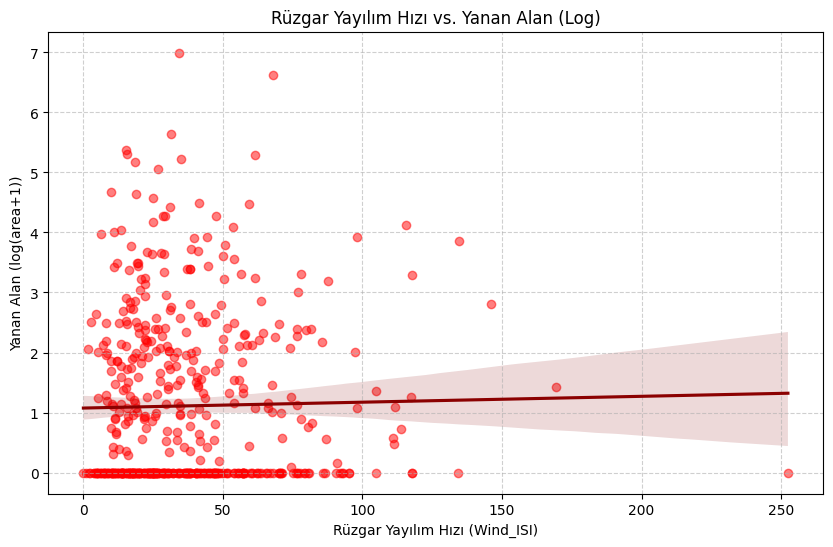

In [5]:
# Rüzgar hızı ile yayılım indeksinin çarpımı
df['wind_ISI_impact'] = df['wind'] * df['ISI']

plt.figure(figsize=(10, 6))
sns.regplot(x='wind_ISI_impact', y='log_area', data=df,
            scatter_kws={'alpha':0.5, 'color':'red'},
            line_kws={'color':'darkred'})

plt.title('Rüzgar Yayılım Hızı vs. Yanan Alan (Log)')
plt.xlabel('Rüzgar Yayılım Hızı (Wind_ISI)')
plt.ylabel('Yanan Alan (log(area+1))')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

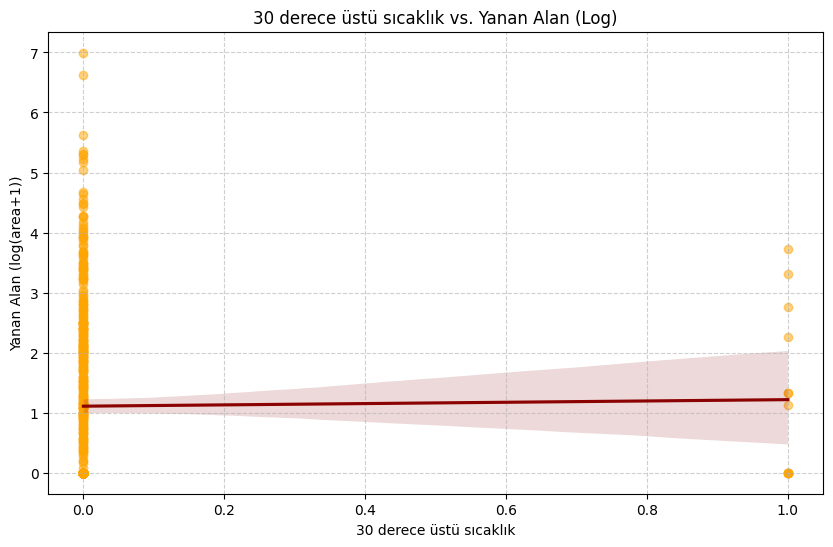

In [6]:
# 30 derece üstü çok riskli (1), altı daha az riskli (0)
df['high_temp_risk'] = (df['temp'] > 30).astype(int)

plt.figure(figsize=(10, 6))
sns.regplot(x='high_temp_risk', y='log_area', data=df,
            scatter_kws={'alpha':0.5, 'color':'orange'},
            line_kws={'color':'darkred'})

plt.title('30 derece üstü sıcaklık vs. Yanan Alan (Log)')
plt.xlabel('30 derece üstü sıcaklık')
plt.ylabel('Yanan Alan (log(area+1))')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Genelde hava 30 dereceyi geçtiğinde orman girişleri yasaklanır ve gözetleme kuleleri maksimum alarma geçer. Bu yüzden yangın çıksa bile çok hızlı söndürüldüğü için alan 0 kalır.

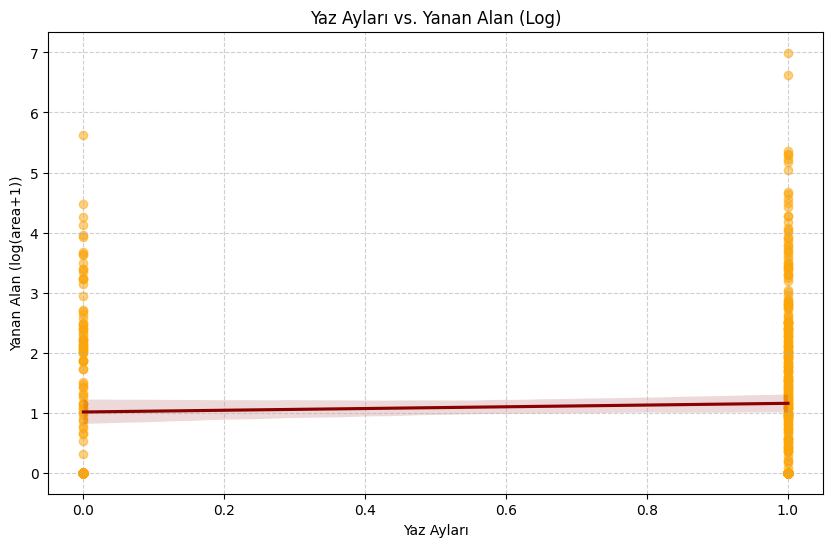

In [7]:
# Ağustos ve Eylül ayları veri setinde yangınların en yoğun olduğu aylardır
# Bu ayları yaz ayı olarak kabul edip is_summer sütunu olarak ekleyeceğiz.
df['is_summer'] = df['month'].apply(lambda x: 1 if x in ['aug', 'sep'] else 0)

plt.figure(figsize=(10, 6))
sns.regplot(x='is_summer', y='log_area', data=df,
            scatter_kws={'alpha':0.5, 'color':'orange'},
            line_kws={'color':'darkred'})

plt.title('Yaz Ayları vs. Yanan Alan (Log)')
plt.xlabel('Yaz Ayları')
plt.ylabel('Yanan Alan (log(area+1))')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Yangınların büyük bir çoğunluğu ve en geniş alanlı olanları Ağustos ve Eylül aylarında kümelenmiştir. Bu da mevsimselliğin yangın şiddeti üzerindeki baskın etkisini kanıtlar.

Regresyon çizgisinin pozitif eğimi, is_summer değişkeni ile log_area arasında pozitif bir korelasyon olduğunu gösterir. Yani 'Yaz Mevsimi' durumu, yangın alanının büyüme olasılığını istatistiksel olarak artırmaktadır.

Yaz aylarında yangınların sadece sayısı artmamakta, aynı zamanda kontrol edilemez hale gelip büyük alanlara yayılma varyansı da yükselmektedir. Diğer aylarda büyük yangın çıkma ihtimali çok daha düşüktür

In [8]:
# One-Hot Encoding
# 'month' ve 'day' sütunlarını One-Hot Encoding ile sayısal yapalım
df_final = pd.get_dummies(df, columns=['month', 'day'])

# Veri setinin yeni hali
print(df_final.head())

   X  Y  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  month_nov  \
0  7  5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...      False   
1  7  4  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...      False   
2  7  4  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...      False   
3  8  6  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...      False   
4  8  6  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...      False   

   month_oct  month_sep  day_fri  day_mon  day_sat  day_sun  day_thu  day_tue  \
0      False      False     True    False    False    False    False    False   
1       True      False    False    False    False    False    False     True   
2       True      False    False    False     True    False    False    False   
3      False      False     True    False    False    False    False    False   
4      False      False    False    False    False     True    False    False   

   day_wed  
0    False  
1    False  
2    False  
3    False  
4    Fals

In [9]:
# Sadece orijinal 'area' sütununu çıkarıyoruz.
if 'area' in df_final.columns:
    df_final = df_final.drop('area', axis=1)

# --- SON KONTROL VE KAYDETME ---
print("Veri Hazırlama Tamamlandı!")
print(f"Veri Seti Boyutu: {df_final.shape}")
print("-" * 30)
print("Yeni Eklenen Sütunların Kontrolü:")
print(df_final[['log_area', 'wind_ISI_impact', 'high_temp_risk', 'is_summer']].head())

# CSV olarak kaydet (index=False fazladan numara sütunu oluşmasını engeller.)
df_final.to_csv('forestfires_processed.csv', index=False)

Veri Hazırlama Tamamlandı!
Veri Seti Boyutu: (517, 35)
------------------------------
Yeni Eklenen Sütunların Kontrolü:
   log_area  wind_ISI_impact  high_temp_risk  is_summer
0       0.0            34.17               0          0
1       0.0             6.03               0          0
2       0.0             8.71               0          0
3       0.0            36.00               0          0
4       0.0            17.28               0          0


# 4. MODEL OLUŞTURMA

In [10]:
X = df_final.drop(['log_area'], axis=1)
y = df_final['log_area'] # Hedef olarak logaritmik alanı kullanıyoruz

# ---------------------------------------------------------
# 2. KORELASYON ANALİZİ VE TEMİZLİK
# ---------------------------------------------------------
# Amacımız: Birbiriyle çok yüksek ilişkiye sahip (korelasyon > 0.85) değişkenlerden
# birini eleyerek modelin karmaşıklığını azaltmak ve overfitting'i önlemek.

# Korelasyon matrisini hesapla (Mutlak değer)
corr_matrix = X.corr(numeric_only=True).abs()

# Matrisin üst üçgenini seç (Aynı ikilileri tekrar etmemek için)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# %85'ten yüksek korelasyona sahip sütunları bul
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

print(f"Yüksek korelasyon nedeniyle çıkarılan değişkenler: {to_drop}")

# Belirlenen sütunları veri setinden çıkar
X = X.drop(columns=to_drop)

# ---------------------------------------------------------
# 3. VERİ SETİNİ BÖLME VE ÖLÇEKLENDİRME
# ---------------------------------------------------------
# Veriyi %80 Eğitim, %20 Test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir (Standard Scaling)
# Sütun isimlerini korumak için DataFrame'e geri çeviriyoruz
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X.columns)

# ---------------------------------------------------------
# 4. MODELLEME VE HİPERPARAMETRE OPTİMİZASYONU (GridSearch)
# ---------------------------------------------------------
# Denenecek modeller ve optimize edilecek parametre aralıkları

models_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20, None],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['rbf', 'linear'], # Çekirdek fonksiyonu
            'C': [1, 10],
            'epsilon': [0.1, 0.5]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'n_estimators': [100, 200],    # Ağaç sayısı
            'learning_rate': [0.01, 0.1],  # Öğrenme hızı (Daha küçük = daha dikkatli)
            'max_depth': [3, 5]            # Ağaç derinliği
        }
    }
}

results = []

print("\nModeller eğitiliyor ve optimize ediliyor (Bu işlem biraz sürebilir)...")

for model_name, mp in models_params.items():
    # GridSearch: En iyi parametreleri bulmak için çapraz doğrulama (CV=5) yapar
    clf = GridSearchCV(mp['model'], mp['params'], cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-1)

    # Modeli eğit
    clf.fit(X_train_scaled, y_train)

    # En iyi model ile test seti üzerinde tahmin yap
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Başarı metriklerini hesapla
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Best Params': str(clf.best_params_) if mp['params'] else "Default",
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    })

# ---------------------------------------------------------
# 5. SONUÇLARIN RAPORLANMASI
# ---------------------------------------------------------
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("MODEL PERFORMANS TABLOSU (Hedef: Log Area)")
print("="*80)
print(results_df[['Model', 'MAE', 'RMSE', 'R2 Score']])

# En başarılı modeli seç (RMSE değeri en düşük olan)
best_model_row = results_df.loc[results_df['RMSE'].idxmin()]

print("\n" + "-"*80)
print(f"EN BAŞARILI MODEL: {best_model_row['Model']}")
print(f"En Düşük Hata (RMSE): {best_model_row['RMSE']:.4f}")
print(f"En İyi Parametreler: {best_model_row['Best Params']}")
print("-"*80)

Yüksek korelasyon nedeniyle çıkarılan değişkenler: ['drought_index']

Modeller eğitiliyor ve optimize ediliyor (Bu işlem biraz sürebilir)...

MODEL PERFORMANS TABLOSU (Hedef: Log Area)
               Model       MAE      RMSE  R2 Score
0  Linear Regression  1.202843  1.515425 -0.044885
1      Random Forest  1.216122  1.507162 -0.033521
2                SVR  1.135579  1.540553 -0.079824
3            XGBoost  1.197789  1.471106  0.015337

--------------------------------------------------------------------------------
EN BAŞARILI MODEL: XGBoost
En Düşük Hata (RMSE): 1.4711
En İyi Parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
--------------------------------------------------------------------------------


# Sonuç

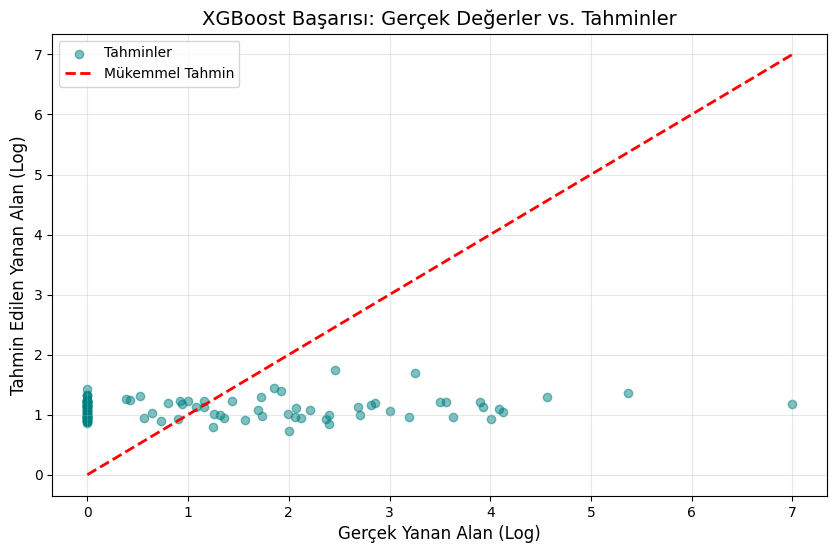

In [11]:
# 1. En iyi parametrelerle Final Modeli Kuruyoruz
final_model = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.01,      # GridSearch'ten gelen en iyi değerler
    max_depth=3,
    n_estimators=100,
    random_state=42
)

# 2. Modeli Eğitiyoruz
final_model.fit(X_train_scaled, y_train)

# 3. Tahmin Yapıyoruz
y_pred_final = final_model.predict(X_test_scaled)

# 4. "Gerçek vs Tahmin" Grafiğini Çiziyoruz
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5, color='teal', label='Tahminler')

# Mükemmel tahmin çizgisini (y=x) ekliyoruz(Kırmızı Çizgi)
# Bu çizgiye ne kadar yakınlarsa o kadar iyi
min_val = min(y_test.min(), y_pred_final.min())
max_val = max(y_test.max(), y_pred_final.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Mükemmel Tahmin')

plt.title('XGBoost Başarısı: Gerçek Değerler vs. Tahminler', fontsize=14)
plt.xlabel('Gerçek Yanan Alan (Log)', fontsize=12)
plt.ylabel('Tahmin Edilen Yanan Alan (Log)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Öznitelik Önem Düzeyi

/tmp/ipython-input-1097848840.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')


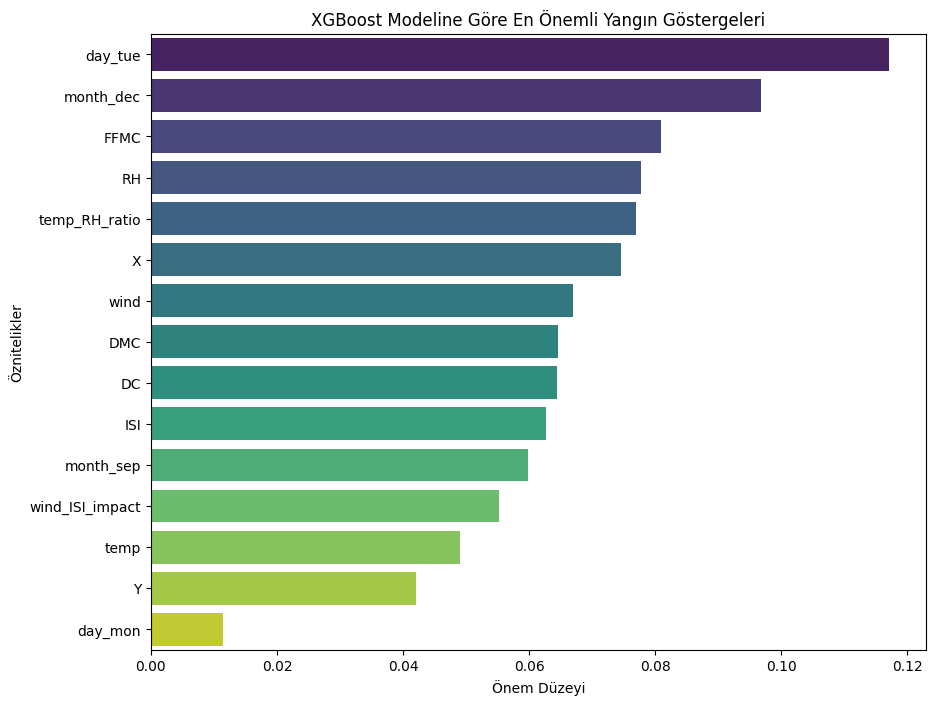


En Önemli 10 Özellik:
          Feature  Importance
31        day_tue    0.117066
16      month_dec    0.096841
2            FFMC    0.080971
7              RH    0.077703
10  temp_RH_ratio    0.076990
0               X    0.074525
8            wind    0.066882
3             DMC    0.064519
4              DC    0.064455
5             ISI    0.062700


In [ ]:
# 1. En iyi parametrelerle XGBoost'u tekrar tanımlıyoruz
best_xgb = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,        # Çıktıdaki en iyi değer
    learning_rate=0.01,      # Çıktıdaki en iyi değer
    max_depth=3,             # Çıktıdaki en iyi değer
    random_state=42
)

# 2. Model eğitimi
best_xgb.fit(X_train_scaled, y_train)

# 3. Hangi özelliğin ne kadar önemli olduğunu çekiyoruz
feature_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 4. Görselleştirme (Bar Plot)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15), palette='viridis')
plt.title('XGBoost Modeline Göre En Önemli Yangın Göstergeleri')
plt.xlabel('Önem Düzeyi')
plt.ylabel('Öznitelikler')
plt.show()

# Tablo olarak
print("\nEn Önemli 10 Özellik:")
print(feature_importances.head(10))

## Model Karşılaştırma Grafiği

/tmp/ipython-input-4238981868.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='RMSE', data=df_results, palette=colors)


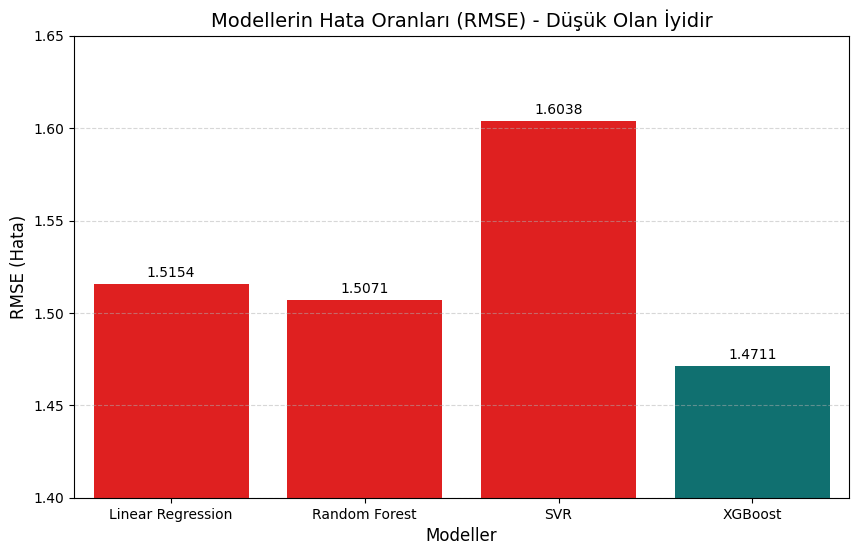

In [ ]:
results_data = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'XGBoost'],
    'RMSE': [1.5154, 1.5071, 1.6038, 1.4711]
}
df_results = pd.DataFrame(results_data)

# Grafiği çiziyoruz
plt.figure(figsize=(10, 6))

# Renk paleti: XGBoost'u farklı renkle vurgular
colors = ['red', 'red', 'red', 'teal']

ax = sns.barplot(x='Model', y='RMSE', data=df_results, palette=colors)

# Çubukların üzerine değerleri yazdır
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', padding=3)

plt.title('Modellerin Hata Oranları (RMSE) - Düşük Olan İyidir', fontsize=14)
plt.ylabel('RMSE (Hata)', fontsize=12)
plt.xlabel('Modeller', fontsize=12)
# Y eksenini biraz sınırlıyoruz ki fark net görünsün (Zoom effect)
plt.ylim(1.40, 1.65)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()